# Find AI NEWS 

In [1]:
AI_SEARCH_QUERIES = [
    ["New AI model", "AI model release", "AI model launch", "AI model update", "AI model upgrade", "AI model release date"],
    ["AI open source", "HuggingFace", "AI Github", "AI Llama"],
    ["AI breakthrough", "AI innovation"],
    ["AI Tool", "AI feature", "AI software", "AI product", "AI service", "AI platform", "AI API", "AI application", "AI project"],
    ["AI Assistant", "AI Personal Assistant"],
    ["AI report", "AI book", "AI journal", "AI conference", "AI event", "AI competition", "AI challenge", "AI hackathon", "AI workshop"],
    ["AI interview", "AI debate", "AI forum"],
    ["AI business", "AI profession", "AI career", "AI job", "AI work", "AI employment", "AI salary", "AI income", "AI wage", "AI money"],
    ["Generative AI"],
    ["OpenAI", "GPT"],
    ["Anthropic AI", "Claude AI"],
    ["Gemini AI", "Google AI", "Deepmind"],
    ["Mistral AI"],
    ["Cohere AI"],
    ["Meta AI"],
    ["Perplexity AI"],
    ["Microsoft AI", "Microsoft Copilot"],
    ["AI Powered device"],
    ["AI Robotics", "AI humanoid", "AI robot", "AI robots"],
    ["AI research", "AI research paper", "AI research lab", "AI researcher"],
    ["AI Agents", "AI Agent", "Autonomous AI", "AI Collaboration"],
    ["LLM", "Large Language Model", "LLM Tokens", "LLM Context window"],
    ["LLM Prompt", "LLM Prompting", "Prompt Engineering", "Prompt Tuning", "Prompt Evaluation", "Zero-shot LLM", "Few-shot LLM"],
    ["LLM Training", "LLM Training data", "LLM Training cost"],
    ["AI Dataset", "AI Datasets"],
    ["AI Transformer", "AI Mamba"],
    ["LLM Mobile", "LLM Phone", "Embedded LLM", "LLM on device"],
    ["Small Language Model", "Small LLM", "AI SLM"],
    ["AI Langchain", "AI Framework", "AI Library", "CrewAI", "LlamaIndex"],
    ["AI Chatbot"],
    ["low code AI", "no code AI"],
    ["AI blockchain"],
    ["AI Regulations"],
    ["AI Intel", "AI groq", "AI AMD", "AI ARM", "AI Tesla Chips", "AI Tesla Dojo"],
    ["AI Hardware", "AI Chip demand", "AI chip competition"],
    ["AI Nvidia"],
    ["AI Apple"],
    ["AI Tesla", "AI Elon Musk"],
    ["Twitter AI", "AI Grok", "xAI"],
    ["AI Car", "AI self driving car", "AI autonomous car", "AI Waymo", "AI Cruise", "AI Uber", "AI Lyft"],
    ["AI drone"],
    ["AI Military"],
    ["AI Competition"],
    ["AI Startup", "AI Startups"],
    ["AI funding", "AI investment", "AI venture capital", "AI acquisition"],
    ["AI Avatar", "AI content generation", "AI content creation", "AI social media", "AI influencer"],
    ["AI Adobe"],
    ["AI tiktok", "AI Instagram", "AI Facebook", "AI Twitter", "AI Snapchat", "AI Youtube", "AI Reddit", "AI Pinterest", "AI Linkedin"],
    ["AI Problem solving", "AI Reasoning", "AI planning"],
    ["AI Cloud", "AI Cloud computing", "AI Cloud service", "AI Cloud platform"],
    ["AI AWS", "AI Azure", "AI Google Cloud"],
    ["AI Virtual Reality", "AI VR", "AI AR", "AI Augmented Reality"],
    ["AI Video game", "AI Gaming", "AI Game"],
    ["AI Education", "AI Learning", "AI School", "AI University"],
    ["Explainable AI", "AI interpretability", "AI explainability"],
    ["AI Image recognition", "Multimodal LLM"],
    ["AI Image generation", "Midjourney", "OpenAI Dalle", "OpenAI Dall-e", "Stable diffusion"],
    ["AI Video generation", "AI Video", "OpenAI Sora", "AI Video Analysis", "Google AI Lumiere"],
    ["AI Music generation", "AI Music"],
    ["AI Voice generation", "AI Voice synthesis", "AI voice recognition"],
    ["AI Scandal", "AI Controversy", "AI trial", "AI lawsuit"],
    ["AI Hack", "AI Cybersecurity", "AI Attack", "AI Jailbreak"],
    ["AI Deepfake", "AI Deepfakes", "AI Deepfake detection", "AI Deepfake creation"],
    ["AI detector", "AI detection", "AI detection tool", "AI detection software"],
    ["AI Coding", "AI Programming", "Github Copilot", "AI Github", "AI Autonomous coding"],
    ["AI AGI", "AI ASI", "AI Singularity", "AI Superintelligence", "AI SSI"],
    ["AI Consciousness", "AI Sentience", "AI Emotion", "AI Creativity", "AI Art"],
    ["AI Turing test", "AI Benchmark", "AI Evaluation"],
    ["AI Brain", "AI Brain chip"],
    ["Sam Altman", "Elon Musk AI", "Yann LeCun", "Ilya Sutskever", "Stuart Russell", "Demis Hassabis", "Jensen Huang"],
    ["AI Economics", "AI Strategy", "AI Geopolitics"],
    ["AI Power Usage", "AI Energy consumption"],
    ["AI healthcare"]
]

# TODO : localised searches "AI China | IA France | AI Germany | AI UK | AI US | AI Russia | AI India | AI Japan | AI Korea | AI Canada | AI Australia",

# Perform the search

In [2]:
%pip install -q duckduckgo-search[lxml] tqdm pytz

from duckduckgo_search import DDGS
from pprint import pprint

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install -q tenacity

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from tqdm import tqdm
import time
from datetime import datetime
import pytz
import requests
from duckduckgo_search.exceptions import RatelimitException
from tenacity import retry, stop_after_attempt, wait_exponential
from collections import defaultdict

INITIAL_SLEEP_TIME = 5
MAX_SLEEP_TIME = 60
MAX_RESULTS = 100
TIME_LIMIT = "m"
MAX_RETRIES = 5
TIMEOUT = 30  # seconds

duplicates = defaultdict(int)

@retry(stop=stop_after_attempt(MAX_RETRIES), 
       wait=wait_exponential(multiplier=2, min=INITIAL_SLEEP_TIME, max=MAX_SLEEP_TIME))
def search_with_retry(ddgs: DDGS, query:str, max_results:int, timelimit:str):
    try:
        return list(ddgs.news(query, max_results=max_results, timelimit=timelimit))
    except RatelimitException:
        print(f"Rate limit hit for query: {query}. Retrying...")
        raise
    except requests.exceptions.Timeout:
        print(f"Timeout occurred for query: {query}. Retrying...")
        raise
    except Exception as e:
        print(f"Unexpected error occurred for query: {query}: {str(e)}. Retrying...")
        raise

def perform_search(queries: list[str]):
    results = {}
    ddgs = DDGS(timeout=TIMEOUT)

    with tqdm(total=len(queries), desc="Searching") as pbar:
        for query in queries:
            pbar.set_postfix(query=query)
            try:
                search_results = search_with_retry(ddgs, query, MAX_RESULTS, TIME_LIMIT)
                for result in search_results:
                    url = result['url']
                    if url not in results:
                        result['found_at'] = datetime.now(pytz.utc).isoformat()
                        results[url] = result
                    else:
                        duplicates[url] += 1
            except Exception as e:
                print(f"Failed to complete search for query: {query}. Error: {str(e)}")
            finally:
                time.sleep(INITIAL_SLEEP_TIME)
                pbar.update(1)
    
    return results

results = perform_search([query for queries in AI_SEARCH_QUERIES for query in queries])

print(f"Found {len(results)} unique results")
print(f"Found {len(duplicates)} duplicate URLs")
print(f"Total number of duplicate instances: {sum(duplicates.values())}")

# If you want to see the URLs with the highest number of duplicates:
top_duplicates = sorted(duplicates.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 duplicated URLs:")
for url, count in top_duplicates:
    print(f"{url}: {count} times")


Searching: 100%|██████████| 244/244 [22:12<00:00,  5.46s/it, query=AI healthcare]        

Found 12752 unique results
Found 4076 duplicate URLs
Total number of duplicate instances: 8942

Top 10 duplicated URLs:
https://www.infoworld.com/article/3715584/ai-development-on-a-copilot-pc-not-yet.html: 33 times
https://mashable.com/article/ai-era-sparked-by-gamification: 25 times
https://www.crn.com/news/ai/2024/the-10-most-well-funded-ai-startups-of-2024-so-far: 23 times
https://www.crn.com/news/ai/2024/the-10-hottest-ai-startups-of-2024-so-far: 21 times
https://www.usatoday.com/money/blueprint/investing/best-ai-stocks/: 20 times
https://www.msn.com/en-us/news/technology/transcript-the-futurist-the-new-age-of-ai/ar-BB1oSys4: 18 times
https://visualstudiomagazine.com/Articles/2024/06/26/coding-assistants.aspx: 18 times
https://techcrunch.com/2024/06/26/this-week-in-ai-the-fate-of-generative-ai-is-in-the-courts-hands/: 17 times
https://conventuslaw.com/report/flying-high-with-air-how-relativitys-generative-ai-solutions-embrace-rapid-innovation/: 16 times
https://techcrunch.com/2024

### Convert the dates to datetime objects

In [9]:
for result in results.values():
    if isinstance(result['date'], str):
        result['date'] = datetime.fromisoformat(result['date'])
    if isinstance(result['found_at'], str):
        result['found_at'] = datetime.fromisoformat(result['found_at'])

assert all(isinstance(result['date'], datetime) for result in results.values())
assert all(isinstance(result['found_at'], datetime) for result in results.values())

### Some graphs

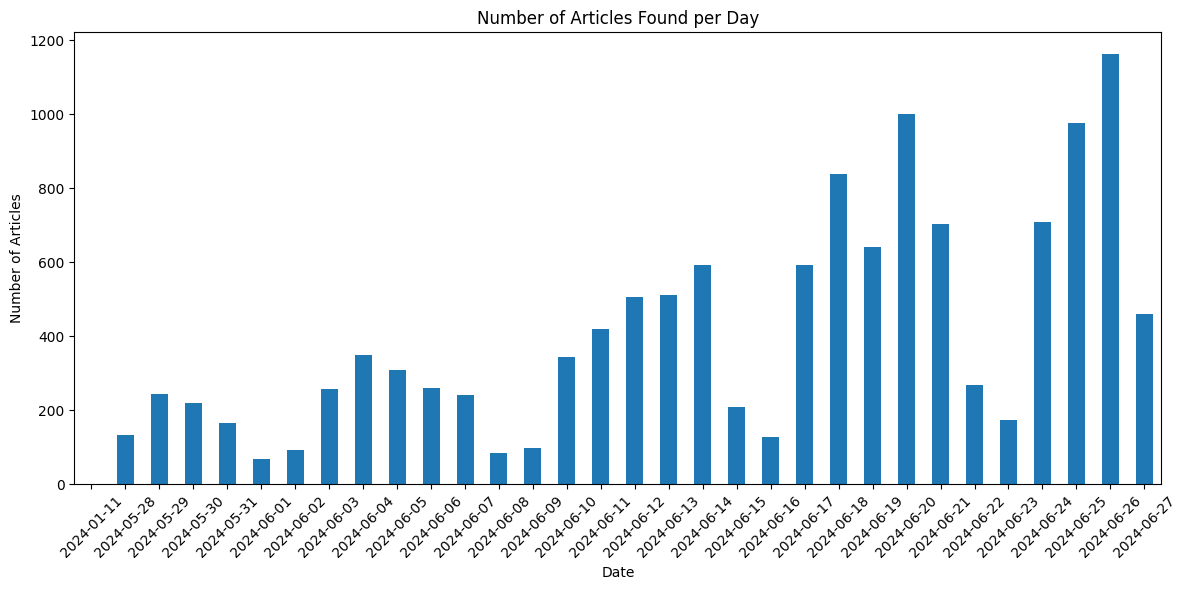

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming 'results' is your dictionary of search results

# Convert the results to a DataFrame
df = pd.DataFrame(results.values())

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group by date and count the number of articles
daily_counts = df.groupby(df['date'].dt.date).size().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='bar')

plt.title('Number of Articles Found per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# MongoDB Export

In [10]:
%pip install -q pymongo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from dotenv import load_dotenv
from pymongo import MongoClient
import os

load_dotenv()

client = MongoClient(os.getenv("MONGODB_URI"))

db = client["blogdb"]

collection = db["ai_news"]

In [14]:
from pymongo.errors import BulkWriteError

assert all(isinstance(result['date'], datetime) for result in results.values())
assert all(isinstance(result['found_at'], datetime) for result in results.values())


try:
    result = collection.insert_many(results.values(), ordered=False)
    print(f"Inserted {len(result.inserted_ids)} documents")
except BulkWriteError as e:
    print(f"Inserted {e.details['nInserted']} documents")
    print(f"Encountered {len(e.details['writeErrors'])} errors") # number of duplicates


Inserted 8729 documents
Encountered 4023 errors


# File Export 

In [6]:
from datetime import date

### CSV

In [7]:
import pandas as pd

file_name = f"ai_news_{date.today().isoformat()}.csv"

df = pd.DataFrame(results.values())

df.to_csv(file_name, index=False)


### JSON

In [49]:
from json import dumps


file_name = f"ai_news_{date.today().isoformat()}.json"

with open(file_name, "w") as f:
    f.write(dumps(results, indent=4))
